# 1 EDA en actividad global del sistema Ecobici y limpieza de datos

In [5]:
%%HTML
<b>Siguiente sección: </b>
<a href="http://nbviewer.jupyter.org/github/jaircastruita/visualizations/blob/master/ECOBICI_analysis_diversity_rank.ipynb">
Diversidad de rango: Una breve explicación.</a>

¿Qué es Ecobici? Para comenzar, Ecobici es el sistema de bike sharing system (BSS) con el que se cuenta en la ciudad de México. Inaugurado en febrero del 2010 ha experimentado un continuo extendimiento a traves de la ciudad debido a su popularización. El funcionamiento es bastante sencillo: El usuario interesado en adquirir el acceso al servicio puede conseguirlo pagando una suscripción anual o semanal donde se le concede una tarjeta RFID con la que puede retirar bicicletas disponibles en cualquier estación que forme parte del programa de Ecobici. El usuario dispone de 30 minutos para desplazarse y hacer entrega del vehículo en cualquier otra estación de la ciudad, tarifas extra aplican en caso de exceder el tiempo mencionado.

El tiempo que lleva en funcionamiento el sistema ha experimentado procesos de expansión, agregando nuevas estaciones y bicicletas en nuevas delegaciones, esto supone mayor interacción entre regiones de la ciudad donde antes no se contaba con el servicio y nuevas dinámicas de viajes que antes no existían.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns; sns.set()

path = r'D:\ownCloud\Documentos posgrado\Posgrado 2do semestre\Seminario investigacion\Experimental Data\Cd Mex\Movilidad\Hist Ecobici\ecobici.csv'

In [2]:
trips = pd.read_csv(path,
                    parse_dates=['date_removed', 'date_arrived'],
                    infer_datetime_format=True,
                    low_memory=False)

# Remove all canceled trip registers
trips = trips.loc[trips['action'] != 'C  ']

# Find the start date
ind = pd.DatetimeIndex(trips.date_arrived)
trips['date'] = ind.date.astype('datetime64')
trips['hour'] = ind.hour

# Count trips by date
by_date = trips.pivot_table('bike',aggfunc='count',
                            index='date',
                            columns='station_arrived', )

Los conjuntos de datos que se muestran a continuación fueron liberados por la CDMX para la actividad creada por lab CDMX, un programa público que invita a la participación ciudadana a utilizar datos y utilizarlos de una manera productiva.

In [4]:
trips.head()

,cust_id,bike,date_removed,station_removed,date_arrived,station_arrived,action,date,hour
5,30,69,2010-02-05 12:44:00,85,2010-02-05 12:46:00,85,A,2010-02-05,12
18,30,67,2010-02-05 15:22:00,85,2010-02-05 15:49:00,85,A,2010-02-05,15
21,30,155,2010-02-11 10:54:00,20,2010-02-11 11:03:00,85,A,2010-02-11,11
22,30,155,2010-02-11 11:15:00,85,2010-02-12 11:42:00,17,A,2010-02-12,11
23,30,413,2010-02-12 12:15:00,26,2010-02-12 12:28:00,26,A,2010-02-12,12


Se puede obtener el número de bicicletas entrantes o salientes por estación, para este caso de exploración de datos se decidió solo trabajar con los datos que corresponden a las bicicletas entrantes por estación

In [3]:
by_date.head()

station_arrived,1,2,3,4,5,6,7,8,9,10,...,269,270,590,1000,1001,1002,1003,2081,2082,2083
date,,,,,,,,,,,,,,,,,,,,,
2010-02-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-02-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-02-12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-02-13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-02-14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Como se puede observar en la visualización anterior, es necesario realizar más tratamiento sobre los datos:
- Primeramente aquellos días que la estación no obtuvo ningún conteo de actividad está marcado como NaN (Not A Number). Para esto solamente se realiza un reemplazo cambiando NaN por 0.
- Existen estaciones con un ID mayor a 275, que no registran actividad coherente en todo el periodo que comprende el conjunto de datos, además de que en el sistema de Ecobici no existen dichas estaciones. Se procede entonces a eliminarlas.

In [4]:
by_date.drop([col for col in list(by_date.columns.values) if col > 275], axis=1, inplace=True)
by_date = by_date.reindex(pd.date_range(by_date.index[0], by_date.index[-1], freq='D')).fillna(0)

In [5]:
by_date.head()

station_arrived,1,2,3,4,5,6,7,8,9,10,...,261,262,263,264,265,266,267,268,269,270
2010-02-05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2010-02-06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2010-02-07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2010-02-08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2010-02-09,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Para dar una idea global sobre la actividad de Ecobici a lo largo del periodo comprendido en el conjunto de datos a continuación se realiza una graficación sobre la suma de conteos de actividad de todas las estaciones a lo largo de un día. Las lineas punteadas verticales representan las fechas en que comprenden las expansiones de la fase 1, 2 y 3 respectivamente. 

Más adelante se presentan ilustraciones sobre el comportamiento del sistema de Ecobici representado mediante el conteo global por día que ha tenido desde su apertura a lo largo de 4 años de funcionamiento, después se realiza un tratamiento a los datos para eliminar aquellos días que el sistema tuvo conteos demasiado bajos con la finalidad de eliminar la actividad ruidosa. 

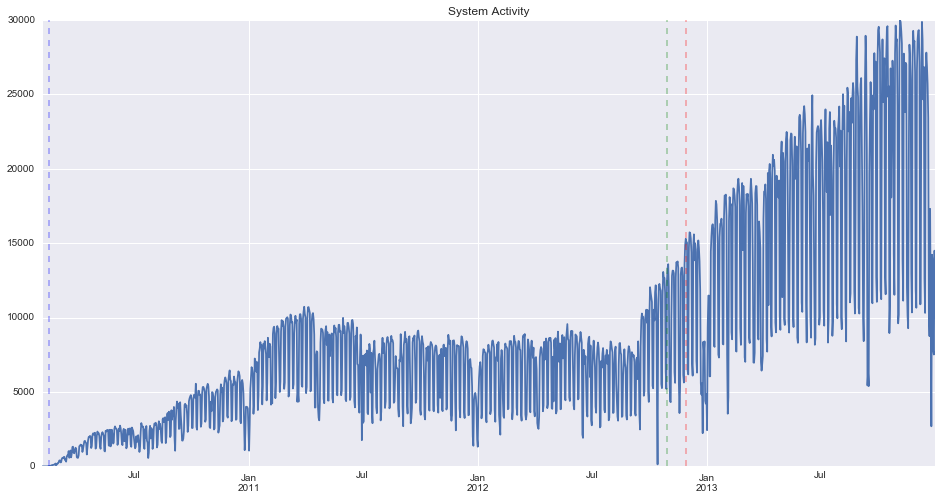

In [6]:
fig, ax = plt.subplots(1, figsize=(16, 8))
by_date.sum(axis=1).plot(title='System Activity');
plt.axvline('2010-02-16', linestyle='--', color='blue', alpha=0.3); # fase 1
plt.axvline('2012-10-29', linestyle='--', color='green', alpha=0.3); # fase 2
plt.axvline('2012-11-29', linestyle='--', color='red', alpha=0.3); # fase 3

Las fechas de apertura para las fases 2 y 3 no son claras y fueron realizadas de manera gradual. Las fechas que utilizamos fueron obtenidas de manera empírica donde se decidió que la fase estaba implementada si el 60% de las estaciones que conforman esa fase se encontraban en actividad (actividad le llamamos a su la estación tuvo conteos ese día).

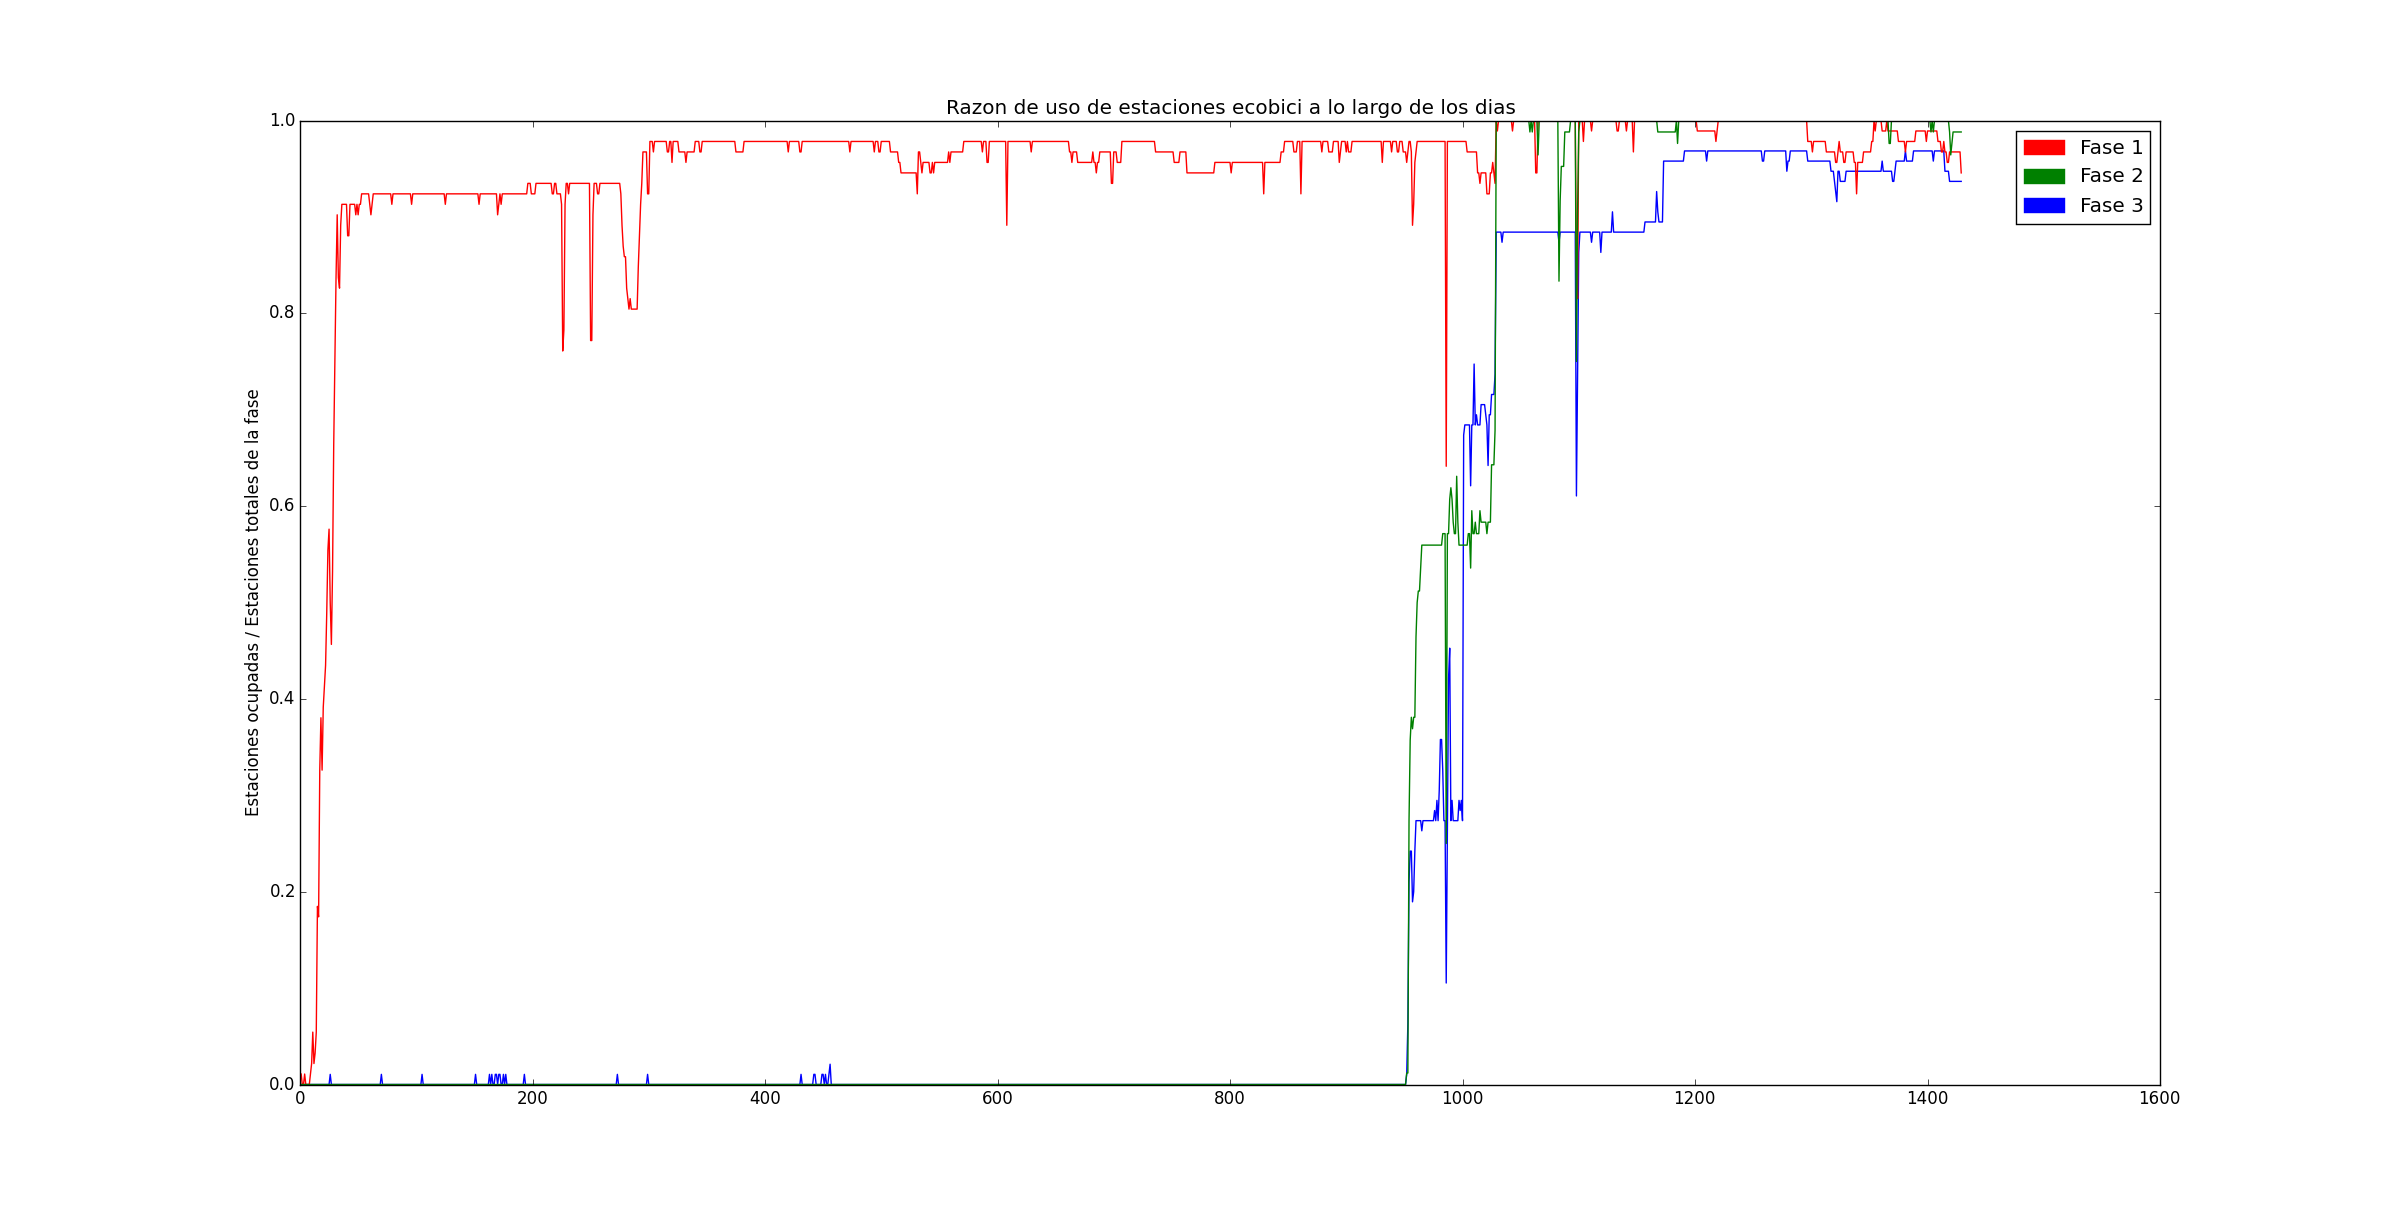

In [4]:
from IPython.display import Image
Image(filename=r'C:\Users\ghost\Google Drive\JairCastruitaGastelum\Progress Reports\Viz\Images\stations_busy_along_time.png') 

De esta forma el gráfico muestra bastante ruido y esto se debe a que los días en fines de semana tienen menor actividad que los días entre semana. A continuación se dividen los días que pertenecen a fines de semana y días entre semana en conjuntos de datos separados y se ofrece una visualización respectiva para cada uno de ellos:

In [7]:
# add a flag indicating weekend
by_date['weekend'] = (by_date.index.dayofweek >= 5)

Primero capturamos los días entre semana:

In [8]:
by_date_weekday = by_date[by_date['weekend'] == False]

Además para capturar la tendencia global del sistema a lo largo de los días se ha procedido a capturar el promedio (moving average) y desviación estándar (moving standard deviation) de los conteos a partir de 20 días previos:

In [9]:
mavg_wd = by_date_weekday.sum(axis=1).rolling(window=20,center=False).mean()
mstd_wd = by_date_weekday.sum(axis=1).rolling(window=20,center=False).std()

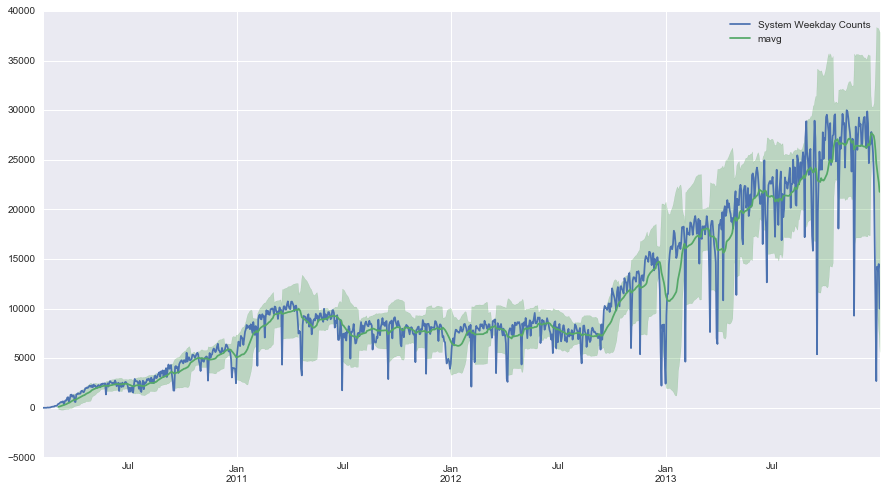

In [10]:
by_date_weekday.sum(axis=1).plot(label='System Weekday Counts');
mavg_wd.plot(label='mavg')
plt.fill_between(mstd_wd.index, mavg_wd-2*mstd_wd, mavg_wd+2*mstd_wd, color='g', alpha=0.2)
plt.legend()
plt.gcf().set_size_inches(15,8)

Del gráfico anterior se aprecia que algunos días a lo largo de este periodo cuentan con una actividad anormalmente baja, incluso para su desviación. Se asume entonces que estos días pueden deberse ya sea a días feriados, días con muy mal clima o días en los que el sistema se suspendió por diversos motivos. 

En el gráfico siguiente solo se grafican aquellos puntos que tienen una actividad mayor a la media menos 2 veces la desviación estándar, es decir que forma parte de alrededor del 95% de las observaciones:

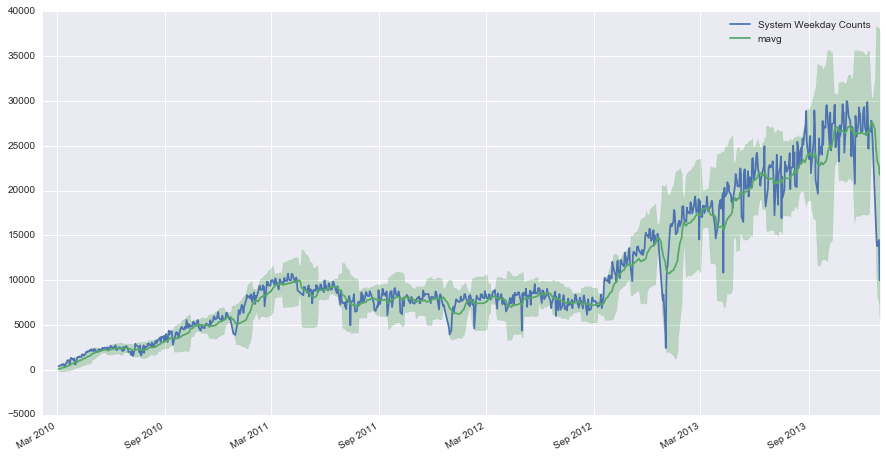

In [11]:
by_date_weekday.sum(axis=1)[by_date_weekday.sum(axis=1) > mavg_wd-2*mstd_wd].plot(label='System Weekday Counts');
mavg_wd.plot(label='mavg')
plt.fill_between(mstd_wd.index, mavg_wd-2*mstd_wd, mavg_wd+2*mstd_wd, color='g', alpha=0.2)
plt.legend()
plt.gcf().set_size_inches(15,8)

Es de notarse que, aunque no desaparecieron todos los datos ruidosos, se suavizó el comportamiento de la curva. A continuación se presentan las fechas de aquellos días que tuvieron una actividad anormalmente baja:

In [12]:
by_date_weekday.sum(axis=1)[by_date_weekday.sum(axis=1) <= mavg_wd-2*mstd_wd].index

DatetimeIndex(['2010-05-25', '2010-06-16', '2010-07-02', '2010-09-16',
               '2010-09-17', '2010-11-02', '2010-11-15', '2010-12-23',
               '2010-12-24', '2010-12-31', '2011-02-07', '2011-03-21',
               '2011-04-18', '2011-04-19', '2011-04-20', '2011-04-21',
               '2011-04-22', '2011-06-17', '2011-06-23', '2011-06-24',
               '2011-06-30', '2011-08-22', '2011-09-16', '2011-11-02',
               '2011-11-21', '2011-12-21', '2011-12-23', '2011-12-26',
               '2011-12-27', '2012-02-06', '2012-03-12', '2012-03-19',
               '2012-04-05', '2012-04-06', '2012-06-01', '2012-06-22',
               '2012-08-09', '2012-08-10', '2012-09-12', '2012-11-02',
               '2012-11-19', '2012-12-21', '2012-12-24', '2012-12-25',
               '2013-02-04', '2013-03-15', '2013-03-18', '2013-03-28',
               '2013-03-29', '2013-05-01', '2013-06-14', '2013-06-21',
               '2013-08-26', '2013-09-06', '2013-09-09', '2013-09-16',
      

Es interesante ver como un filtro tan llano lográ capturar días festivos, tales como el día del grito de independencia en México (16 de septiembre) o como navidad y noche buena (24 y 25 de diciembre). 

Días no festivos que registraron una actividad muy baja pueden deberse a una práctica cultural muy usual en México, conocidos como puentes: días feriados que se otorgan arbitrariamente partiendo de un día feriado a un fin de semana o viceversa.

# Análisis para los fines de semana.

De igual manera como se hizo el análisis anterior para días entre semana se ofrece un análisis similar para fines de semana:

In [13]:
by_date_weekend = by_date[by_date['weekend'] == True]

mavg_we = by_date_weekend.sum(axis=1).rolling(window=20,center=False).mean()
mstd_we = by_date_weekend.sum(axis=1).rolling(window=20,center=False).std()

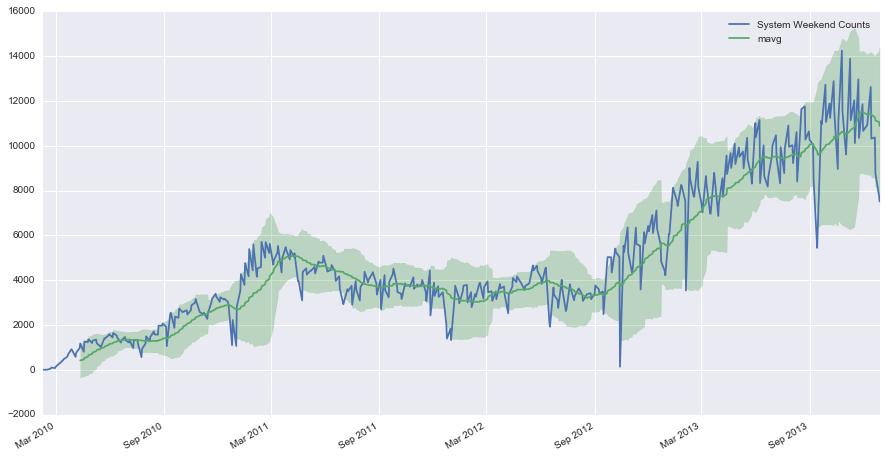

In [14]:
by_date_weekend.sum(axis=1).plot(label='System Weekend Counts');
mavg_we.plot(label='mavg')
plt.fill_between(mstd_we.index, mavg_we-2*mstd_we, mavg_we+2*mstd_we, color='g', alpha=0.2)
plt.legend()
plt.gcf().set_size_inches(15,8)

Aunque menores, existen días cuyo contéo es anormalmente bajo con respecto a los fines de semana anteriores.

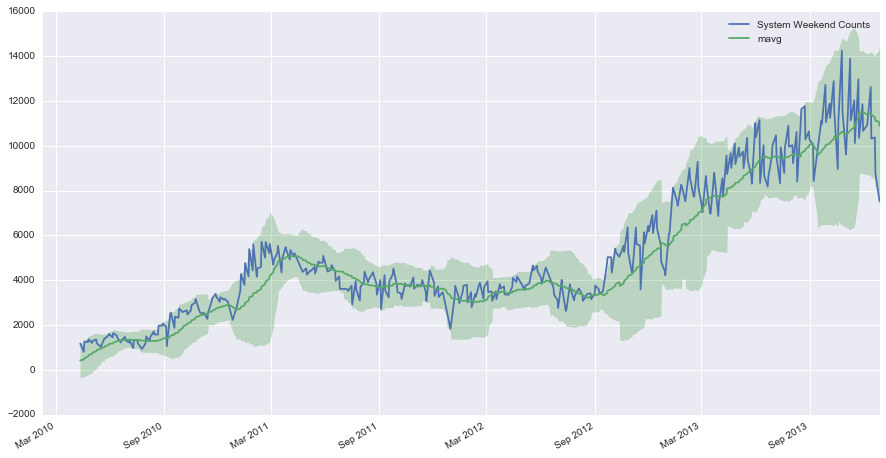

In [15]:
by_date_weekend.sum(axis=1)[by_date_weekend.sum(axis=1) > mavg_we-2*mstd_we].plot(label='System Weekend Counts');
mavg_we.plot(label='mavg')
plt.fill_between(mstd_we.index, mavg_we-2*mstd_we, mavg_we+2*mstd_we, color='g', alpha=0.2)
plt.legend()
plt.gcf().set_size_inches(15,8)

In [16]:
by_date_weekend.sum(axis=1)[by_date_weekend.sum(axis=1) <= mavg_we-2*mstd_we].index

DatetimeIndex(['2010-07-24', '2010-12-25', '2011-01-01', '2011-04-16',
               '2011-04-17', '2011-04-23', '2011-07-02', '2011-07-03',
               '2011-11-27', '2011-12-24', '2011-12-25', '2012-01-01',
               '2012-04-07', '2012-06-16', '2012-06-17', '2012-09-16',
               '2012-10-14', '2013-02-03', '2013-09-14', '2013-09-15',
               '2013-12-28'],
              dtype='datetime64[ns]', freq=None)

De nueva cuenta aparecen algunos días que forman parte de fechas feriadas y otros días en los que no. Por ejemplo se puede apreciar que los primeros días del año casi nadie utiliza el sistema de Ecobici.

De cualquier manera, prescindir de estos días puede ayudar a nuestros modelos a no aprender días con actividad ruidosa en nuestro modelo y así, mejorar un poco su efectividad.

# Duración de viajes en Ecobici

Con el objetivo de ofrecer otro análisis visual, esta vez con respecto a los viajes realizados por Ecobici, se realiza un conteo de la duración relativa de los viajes realizados.

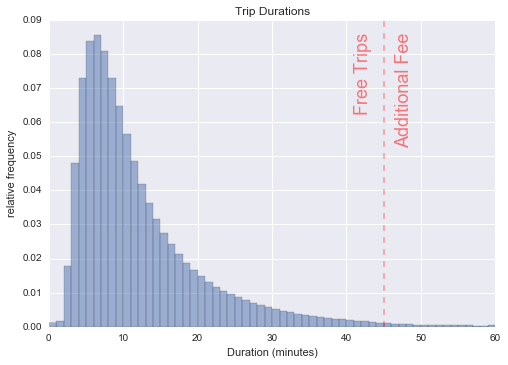

In [17]:
trips['minutes'] = (trips.date_arrived - trips.date_removed).dt.seconds/60
trips['minutes'].hist(bins=np.arange(61), alpha=0.5, normed=True);
plt.xlabel('Duration (minutes)')
plt.ylabel('relative frequency')
plt.title('Trip Durations')
plt.text(49, 0.07, "Free Trips\n\nAdditional Fee", ha='right',
         size=18, rotation=90, alpha=0.5, color='red')
plt.axvline(45, linestyle='--', color='red', alpha=0.3);

De la visualización anterior se muestra que la tendencia en los viajes son menores a 10 minutos. Una posible causa puede ser que la mayoría de los usuarios que utilizan este sistema son trabajadores que utilizan Ecobici para desplazarse a sus trabajos. Las políticas de Ecobici otorgan al usuario un tiempo de 45 minutos gratuitos por viaje, cualquier excedente de este periodo de tiempo se penaliza con una multa monetaria. Se puede apreciar que son muy pocos viajes los que exceden este plazo.

# Viajes vs Elevación

Otro aspecto a considerar cuando se planea un un sistema de bike sharing son las elevaciones entre estaciones, ya que, viajes desde estaciones más elevadas hacia estaciones menos elevadas son más dadas a ocurrir que en caso contrario

In [18]:
distances = pd.read_csv(r'D:\ownCloud\Documentos posgrado\Posgrado 2do semestre\Seminario investigacion\Experimental Data\Cd Mex\Movilidad\Hist Ecobici\ecobici_distancias.csv')
stations = pd.read_csv(r'D:\ownCloud\Documentos posgrado\Posgrado 2do semestre\Seminario investigacion\Experimental Data\Cd Mex\Movilidad\Hist Ecobici\ecobiciestaciones.csv')
elevs = pd.read_csv(r'C:\Users\ghost\Google Drive\JairCastruitaGastelum\Progress Reports\Dev\EDA bike sharing\pruebas\ECOBICI_data\station_elevations.csv', index_col=0)

Las elevaciones fueron obtenidas  gracias a un API que ofrece google en donde se obtiene la elevación de las coordenadas geográficas que se ingresan.

In [19]:
elevs.head()

,elevation,lat,lng,resolution
0,2235.062988,19.43293,-99.16848,4.771976
1,2235.547119,19.43159,-99.17151,4.771976
2,2232.308838,19.43166,-99.15875,9.543952
3,2235.411377,19.42849,-99.17169,4.771976
4,2234.626953,19.42980,-99.16945,4.771976


Se realiza una verificación simple para corroborar que las coordenadas de las estaciones correspondan a las coordenadas de las elevaciones:

In [20]:
# double check that locations match
print(np.allclose(stations.longitud, elevs.lng))
print(np.allclose(stations.latitud, elevs.lat))

True
True


In [21]:
stations['elevation'] = elevs['elevation']
elevs.index = stations['id']

trips['elevation_start'] = trips.join(elevs, on='station_removed')['elevation']
trips['elevation_end'] = trips.join(elevs, on='station_arrived')['elevation']
trips['elevation_gain'] = trips['elevation_end'] - trips['elevation_start']

Si construimos un histograma a partir donde cada bin se capture un rango de elevación de los viajes realizados podemos ver la tendencia que se tienen en los recorridos realizados por los usuarios:

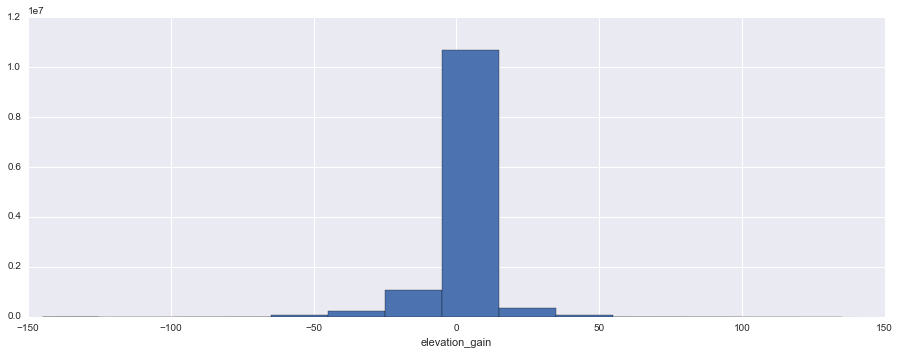

In [22]:
g = sns.FacetGrid(trips)
g.map(plt.hist, "elevation_gain", bins=np.arange(-145, 150, 20))
g.fig.set_figheight(6)
g.fig.set_figwidth(16);

# plot some lines to guide the eye
for lim in range(60, 150, 20):
    x = np.linspace(-lim, lim, 3)
    for ax in g.axes.flat:
        ax.fill(x, 100 * (lim - abs(x)),
                color='gray', alpha=0.1, zorder=0)

In [23]:
print "total downhill trips:", (trips.elevation_gain < 0).sum()
print "total uphill trips:  ", (trips.elevation_gain > 0).sum()

total downhill trips: 6132171
total uphill trips:   5833974


De las visualizaciones anteriores se puede apreciar que, aunque la tendencia efectivamente es la de viajes cuesta abajo, la diferencia entre estos no resulta demasiado marcada. Esto debido a que en la ciudad de México no existen desniveles tan pronunciados como ocurre en sistemas de bike sharing de otros paises.

El próximo notebook se analizará la actividad de las estaciones utilizando técnicas de clustering, en particular se hablará de mixture models.

In [24]:
from IPython.display import HTML
#To hide code from the nbviewer render
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')